# Part I - Data Exploration Analysis

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [33]:
# ================== functions =========================================
# 1. Data types
def data_types_list(data):
    # Get data types of all colums
    data_types = data.dtypes

    # 
    datetime_columns = []
    categorical_columns = []
    numerical_columns = []
    # Separate columns into categorical and numeric
    for col in data.columns:
        if data[col].dtype == 'datetime64[ns]':
            datetime_columns.append(col)
        elif data[col].dtype == 'object':
            categorical_columns.append(col)
        elif data[col].dtype == 'category':
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
            
    return datetime_columns,categorical_columns, numerical_columns
    
    #date_time_columns = data_types[data.dtypes == 'datetime64[ns]'].index.tolist()
    #categorical_columns = data_types[data_types == 'object'].index.tolist()
    #numerical_columns = data_types[(data_types != 'object') or (data_types != 'datetime64[ns]')].index.tolist()
    

# 2. Are there null values in dataset
def data_null_check(data):
    
    if data.isnull().any().any():
        # calculate the total number of rows in the data
        total_rows = len(data)
        # create an empty list called 'columns_with_null' to store information about columns with nill values
        columns_with_null = []
        # Loop through each column to count the number of null value and calculate the percentage of null values relative to the total number of rows.
        for column in data.columns:
            null_count = data[column].isnull().sum()
            if null_count >0:
                columns_with_null.append(column, null_count, null_count/total_rows*100)
        # convert 'columns_with_null' to a new DataFrame called 'columns_with_null_df' for easier viewing
        columns_with_null_df = pd.DataFrame(columns_with_null, columns = ['Column N','Null Count','Null Percentage'])
    
        # Return result
        return columns_with_null_df
        print(columns_with_null_df)
    
    else:
        print('There are no null values in the dataset')
# . Results
def show_results(data):
    # 1. Data_types => return 2 lists of categorical and numeric features in the dataset
    datetime_columns, categorical_columns, numerical_columns = data_types_list(data)
    print('1. Overview the structure of dataset')
    print(' - Total columns in the dataset: {} , in which:'.format(data.shape[1]))
    print(' - Datetime Columns: {} are list in a variable name - datetime_columns '.format(len(datetime_columns)))
    print(' - Categorical Columns: {} are list in a variable name - categorical_columns '.format(len(categorical_columns)))
    print(' - Numeric Columns    : {} are list in a variable name - numerical_columns '.format(len(numerical_columns)))
    print('----------------------------------------')
    print('2. Check null values')
    columns_with_null_df = data_null_check(data)
    print(columns_with_null_df)

In [48]:
# Load data set
dataset = 'df_day_new.csv'
day_weather = pd.read_csv(dataset)
day_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            366 non-null    object
 1   name            367 non-null    object
 2   region          1 non-null      object
 3   country         367 non-null    object
 4   lat             367 non-null    object
 5   lon             367 non-null    object
 6   tz_id           367 non-null    object
 7   maxtemp_c       367 non-null    object
 8   maxtemp_f       367 non-null    object
 9   mintemp_c       367 non-null    object
 10  mintemp_f       367 non-null    object
 11  avgtemp_c       367 non-null    object
 12  avgtemp_f       367 non-null    object
 13  maxwind_mph     367 non-null    object
 14  maxwind_kph     367 non-null    object
 15  totalprecip_mm  367 non-null    object
 16  totalprecip_in  367 non-null    object
 17  avgvis_km       367 non-null    object
 18  avgvis_mil

In [49]:
day_weather.head(5)

,date,name,region,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,...,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
0,NaN,name,region,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,...,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
1,2022-10-17,Ho Chi Minh City,NaN,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,31.3,88.3,22.8,...,79.2,5.4,8.6,2.4,0.09,9.9,6.0,81.0,Patchy rain possible,7.0
2,2022-10-18,Ho Chi Minh City,NaN,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.1,86.2,23.7,...,78.9,7.6,12.2,8.0,0.31,9.8,6.0,87.0,Moderate or heavy rain shower,7.0
3,2022-10-19,Ho Chi Minh City,NaN,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,28.8,83.8,23.6,...,78.2,9.4,15.1,26.5,1.04,9.9,6.0,88.0,Moderate or heavy rain shower,6.0
4,2022-10-20,Ho Chi Minh City,NaN,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,28.0,82.4,23.5,...,77.9,11.6,18.7,15.0,0.59,8.8,5.0,86.0,Moderate or heavy rain shower,6.0


In [50]:
# Remove row 0:
day_weather = day_weather.drop(0, axis=0)

# Remove column 'region' for run values
day_weather = day_weather.drop('region', axis=1)



# Convert column 'date' to datetime
day_weather['date'] = pd.to_datetime(day_weather['date'])


columns_to_convert = [
    'maxtemp_c', 'maxtemp_f', 'mintemp_c', 'mintemp_f', 'avgtemp_c', 'avgtemp_f',
    'maxwind_mph', 'maxwind_kph', 'totalprecip_mm', 'totalprecip_in',
    'avgvis_km', 'avgvis_miles', 'avghumidity', 'uv'
]

# Convert the specified columns to float
for col in columns_to_convert:
    day_weather[col] = day_weather[col].astype(float)
    
# Create a new column 'is_rain'
day_weather['is_rain'] = day_weather['totalprecip_mm'].apply(lambda x: 'Y' if x >0 else 'N')    
#day_weather['is_rain'] = day_weather['is_rain'].astype('category')

In [37]:
day_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 1 to 366
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            366 non-null    datetime64[ns]
 1   name            366 non-null    object        
 2   country         366 non-null    object        
 3   lat             366 non-null    object        
 4   lon             366 non-null    object        
 5   tz_id           366 non-null    object        
 6   maxtemp_c       366 non-null    float64       
 7   maxtemp_f       366 non-null    float64       
 8   mintemp_c       366 non-null    float64       
 9   mintemp_f       366 non-null    float64       
 10  avgtemp_c       366 non-null    float64       
 11  avgtemp_f       366 non-null    float64       
 12  maxwind_mph     366 non-null    float64       
 13  maxwind_kph     366 non-null    float64       
 14  totalprecip_mm  366 non-null    float64       
 15  totalp

In [51]:
# describe the dataset (len, shape)

shape = day_weather.shape
print('-----------------------------')
print('The structure of the dataset:')
print('-----------------------------')
print('The number of observations: ', shape[0])
print('the number of features: ', shape[1])
print('')
# Execute the step: summary statistics
sum_stats = day_weather.describe()
print('Summary Statistics:\n',sum_stats)

-----------------------------
The structure of the dataset:
-----------------------------
The number of observations:  366
the number of features:  22

Summary Statistics:
         maxtemp_c   maxtemp_f   mintemp_c   mintemp_f   avgtemp_c   avgtemp_f  \
count  366.000000  366.000000  366.000000  366.000000  366.000000  366.000000   
mean    32.763388   90.957650   24.473770   76.052186   27.791803   82.026776   
std      2.820759    5.071903    1.653596    2.973330    1.690599    3.042907   
min     24.200000   75.600000   19.600000   67.300000   23.000000   73.500000   
25%     31.000000   87.800000   23.500000   74.225000   26.600000   80.000000   
50%     32.400000   90.300000   24.500000   76.100000   27.700000   81.900000   
75%     34.200000   93.600000   25.600000   78.075000   28.900000   83.975000   
max     40.100000  104.200000   28.800000   83.800000   32.300000   90.100000   

       maxwind_mph  maxwind_kph  totalprecip_mm  totalprecip_in   avgvis_km  \
count   366.000000

In [52]:
# ================= results ===============================================
show_results(day_weather)

1. Overview the structure of dataset
 - Total columns in the dataset: 22 , in which:
 - Datetime Columns: 1 are list in a variable name - datetime_columns 
 - Categorical Columns: 7 are list in a variable name - categorical_columns 
 - Numeric Columns    : 14 are list in a variable name - numerical_columns 
----------------------------------------
2. Check null values
There are no null values in the dataset
None


### What is the structure of your dataset?

> Description: the dataset has a total of 15 columns, each representing specific weather-related features recorded over time. It appears to be organized in a tabular format with rows representing different dates and times at which the weather data was recorded. This tabular structure is commonly used for storing and analyzing structured data, making it suitable for various data analysis tasks, including time series analysis and weather pattern identification.

### What is/are the main feature(s) of interest in your dataset?

> Based on the provided segments of the dataset, the main features of interest appear to be related to weather and enviromental conditions. These features include:
1. Date and Time information: The date and time columns are essential for understanding when each weather observation was recorded.

2. Date Weather Parameters: Various weather-related parameters such as:
2.1 Temperature data:
* Maximun Temperature (maxtemp_c, maxtemp_f)
* Minimun Temperature (mintemp_c, mintemp_f)
* Average Temperature (avgtemp_c, avgtemp_f)
2.2 Wind data:
* Max wind Speed (maxwind_mph, maxwind_kph)
2.3 Precipitation data:
* Total Precipitation ( totalprecip_mm, totalprecip_in)
2.4 Visibility data:
* Average Visibility (avgvis_km, avgvis_miles)
2.5 Humidity data:
* Average Humidity (avghumidity)
2.6 Condition data:
* Weather Conditions Descriptions (conditiontext)
* Weather Condition Icons (condition.icon)
* Weather Condition Codes (conditionscode)
2.7 UV index
* Ultraviolet (UV) index 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To determine which features in the dataset will support the investigation of temperature-related features, we need to consider the nature of weather data and how temperature is influced by various factors. Here are some key features that are likely to be relevant in understanding temperature variations:
1. Date and Time information: Date and time features can help identify daily, monthly, and seasonal patterns in temperature. These features include columns like 'hourtime', 'astro.sunrise', 'astro.sunset', and 'astromoonrise'.

2. Weather Conditions: Weather conditions can significantly impact temperature. Columns such as 'conditiontext','condition.icon', and 'conditioncode' provide information about the current weather conditions, which can be correlated with temperature.

3. Wind data: Wind speed and directon can affect temperature. Features like 'maxwind_mph', 'maxwind_kph', 'hour.wind_mph', and 'hour.wind_kph' can help analyze the relationship between wind and temperature.

4. Precipitation data: To study precipitation patterns, total Precipitation in millimeters and inches (totalprecip_mm, totalprecip_in) can provide valuable insights.

5. Visibility and Humidity data: Average Visibility (avgvis_km, avgvis_miles) and Average Humidity (avghumidity) can be helpful for understanding visibility and humidity trens.

6. UV Index: UV Index (uv) is important for assessing the level of ultraviolet radiation, which can be valuable for health-related analyses.

In [53]:
day_weather.head()

,date,name,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,...,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv,is_rain
1,2022-10-17,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,31.3,88.3,22.8,73.0,...,5.4,8.6,2.4,0.09,9.9,6.0,81.0,Patchy rain possible,7.0,Y
2,2022-10-18,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.1,86.2,23.7,74.7,...,7.6,12.2,8.0,0.31,9.8,6.0,87.0,Moderate or heavy rain shower,7.0,Y
3,2022-10-19,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,28.8,83.8,23.6,74.5,...,9.4,15.1,26.5,1.04,9.9,6.0,88.0,Moderate or heavy rain shower,6.0,Y
4,2022-10-20,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,28.0,82.4,23.5,74.3,...,11.6,18.7,15.0,0.59,8.8,5.0,86.0,Moderate or heavy rain shower,6.0,Y
5,2022-10-21,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,32.0,89.7,23.5,74.3,...,6.0,9.7,2.7,0.11,9.9,6.0,81.0,Heavy rain at times,7.0,Y


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Univariate Exploration for numerical columns

In [54]:
# create a function for Univariate Exploration 
# used for number - numeric_columns
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)

#numeric_columns = [maxtemp_c]

def Uni_analysis_num_cols(data):
    datetime_columns, categorical_columns, numerical_columns = data_types_list(data)
    #numeric_columns = ['maxtemp_c']
    for col in numerical_columns:
        # set up the figure with 3 subplots 
        plt.figure(figsize=(15,4))
        plt.suptitle ('Distribution of {}'.format(col),fontweight = 'bold', color = 'black', fontsize=22)
        plt.gcf().autofmt_xdate()
    
        # Subplot 1: Statistical summary
        plt.subplot(1,3,1)
                              
        # Create a statistical summary 
        stats_summary = data[col].describe().reset_index()
        stats_summary.columns = ['Stat','Value']
        stats_summary['Value']= stats_summary['Value'].round(1)
                      
        stats_tbl = tabulate(stats_summary, headers = ['Stat','Value'], tablefmt='simple', showindex=False)
        plt.text(0.3,0.5, stats_tbl, va='center', fontfamily='monospace',fontsize=14)
        plt.axis('off')
        plt.xlabel('Statictis Summary')
        
        # Subplot 2:
        # Subplot 2: Histogram
        plt.subplot(1,3,2)

        # Create a histogram
        sns.histplot(data=data, x=col, bins=24, kde=True, color ='#97acc9', line_kws={'color':'#D87D7A'})
        #sns.kdeplot(data=trip_data, x='start_hour',color = '#D87D7A')
        ax = sns.histplot(data=data, x=col, bins=24, kde=False, color ='#97acc9', line_kws={'color':'#D87D7A','lw':5})
        ax.lines[0].set_color('#D87D7A')
        ax.lines[0].set_linewidth(1.5)
        #ax.lines[0].set_marker(5)
        plt.xlabel('Hour of Day')
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.xlabel('Histogram')
        plt.ylabel('Frequency')
        
        # Subplot 3: Box plot
        plt.subplot(1,3,3)
        plt.boxplot(data[col], patch_artist = True,notch ='True', vert = 1,showfliers=False
                    ,boxprops=dict(facecolor='#97acc9', color='#97acc9')
                    ,showmeans=True, meanprops=dict(color='#D87D7A',markersize=5)
                    ,medianprops=dict(color='#D87D7A',linewidth=2))
        mu = data[col].mean()
        sigma = data[col].std()
        median = data[col].quantile(q=.5)
        plt.text(1.15, median-0.5,'Median {:,.1f} '.format(median), style='italic', fontweight = 'bold',fontsize =8)
        #plt.text(1.15, mu-0.5,'Mean {:,.1f} '.format(mu), style='italic', fontweight = 'bold',fontsize =8)
        plt.ylabel(col)
        plt.xlabel('Box Plot, without outliers')

        plt.tight_layout()
        plt.show()
        

In [57]:
# create a function for Univariate Exploration 
# used for number - numeric_columns
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)

#numeric_columns = [maxtemp_c]

def Uni_analysis_cate_cols(data):
    datetime_columns, categorical_columns, numeric_columns = data_types_list(day_weather)
    for col in categorical_columns:
        # set up the figure with 3 subplots 
        plt.figure(figsize=(20,5))
        plt.suptitle ('Distribution of {}'.format(col),fontweight = 'bold', color = 'black', fontsize=22)
        plt.gcf().autofmt_xdate()
    
        # Subplot 1: Statistical summary
        plt.subplot(1,2,1)
                              
        #stats_summary = data[col].describe().reset_index()
        #stats_summary.columns = ['Stat','Value']
        #stats_summary['Value']= stats_summary['Value'].round(1)
        
        # Count unique values and their percentages:
        unique_counts = data[col].value_counts()
        percentage_counts = data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        stats_summary = pd.DataFrame({'Unique Values': unique_counts, 'Percentage (%)': percentage_counts})
        stats_summary = stats_summary.reset_index().rename(columns= {'index':col})
                      
        stats_tbl = tabulate(stats_summary, headers = ['Stat','Value'], tablefmt='simple', showindex=False)
        plt.text(0.3,0.5, stats_tbl,va='center', fontfamily='monospace',fontsize=14)
        plt.axis('off')
        plt.xlabel('Statictis Summary')
        
        # Subplot 2:
        # Subplot 2: Bar chart
        #plt.subplot(2,2,2)
        plt.subplot(1,2,2)
        
        Palette = ['#D87D7A','#97acc9','#D1DAE7','#EDC5C4','grey']
        value_counts = data[col].value_counts().head(10)
        labels = value_counts.index

        #sns.barplot(x=value_counts.index, y = value_counts.values, palette = Palette)
        #plt.ylabel('Frequency')
        
        #sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
        sns.barplot(x=value_counts.values, y=value_counts.index, palette=Palette)
        plt.xlabel('Frequency')
        plt.ylabel(col)
        plt.title('Top 10 {}'.format(col))
        # Subplot 3: Box plot
        #plt.subplot(2,2,4)

        plt.tight_layout()
        plt.show()

List of numerical columns:  ['maxtemp_c', 'maxtemp_f', 'mintemp_c', 'mintemp_f', 'avgtemp_c', 'avgtemp_f', 'maxwind_mph', 'maxwind_kph', 'totalprecip_mm', 'totalprecip_in', 'avgvis_km', 'avgvis_miles', 'avghumidity', 'uv']


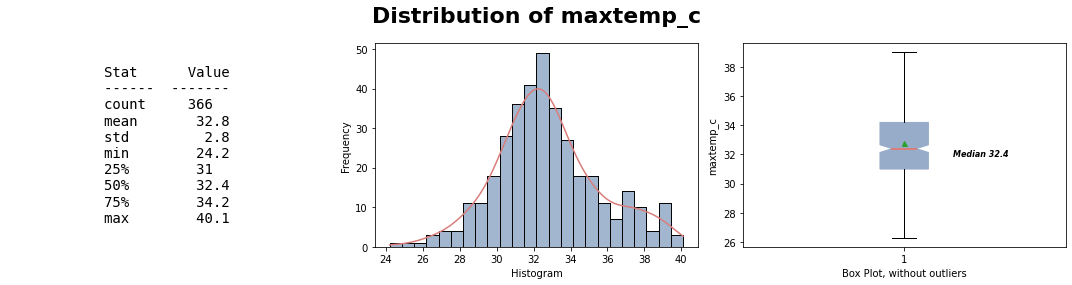

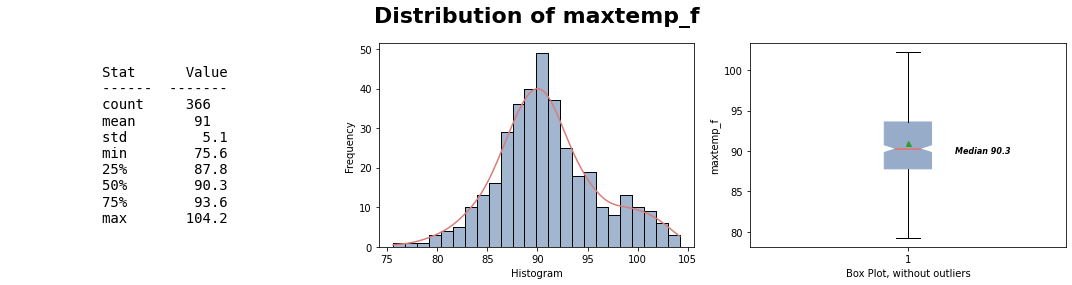

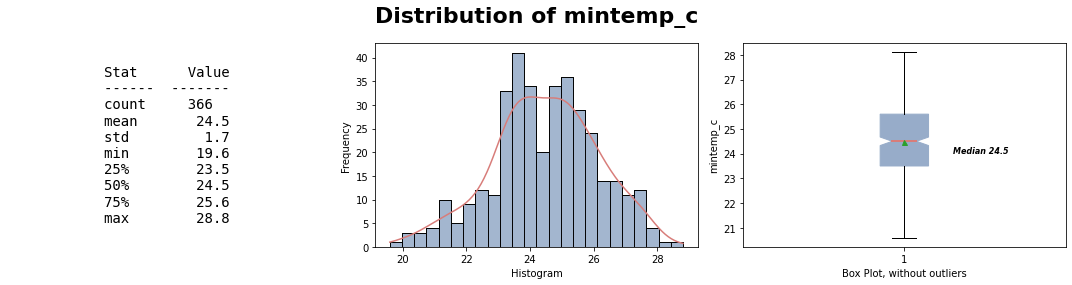

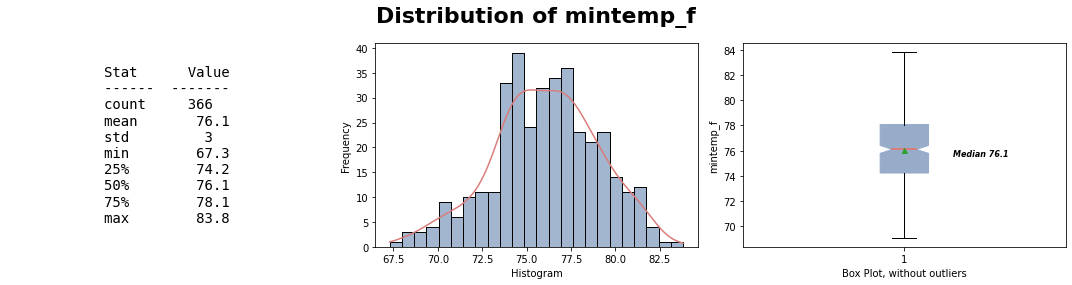

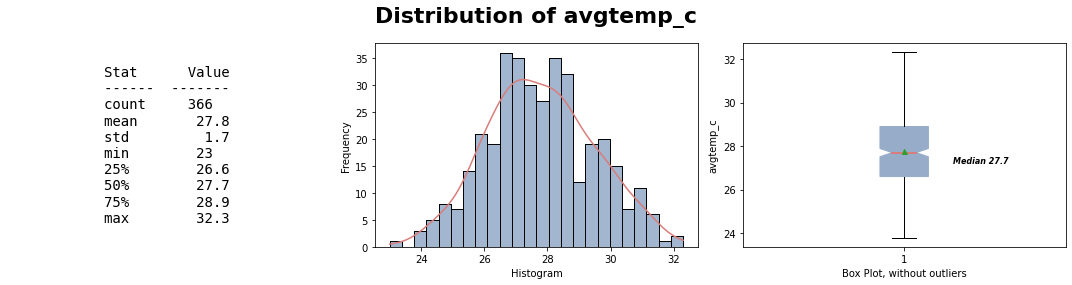

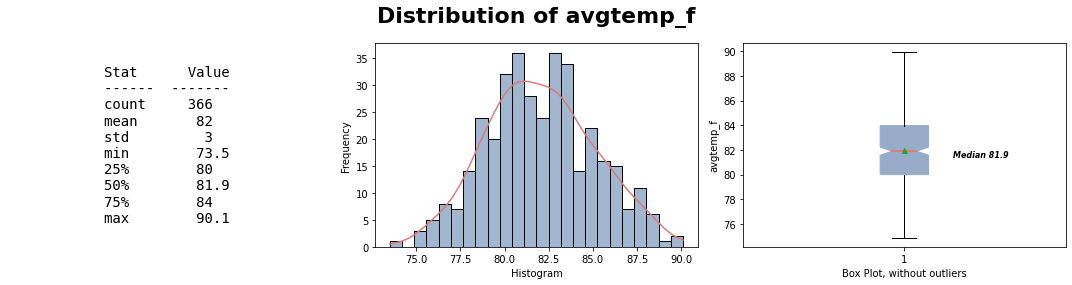

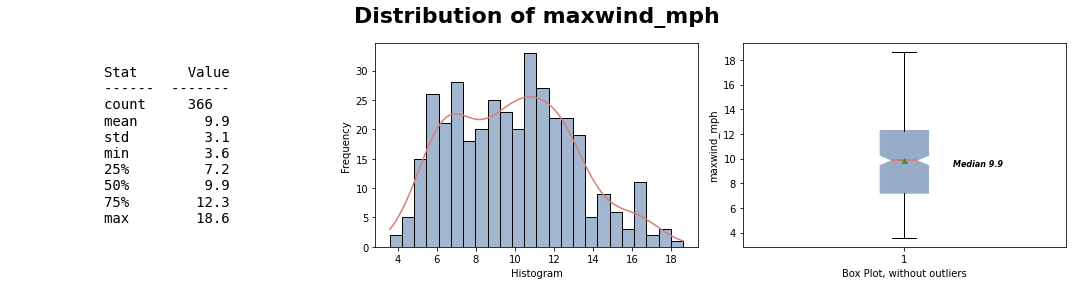

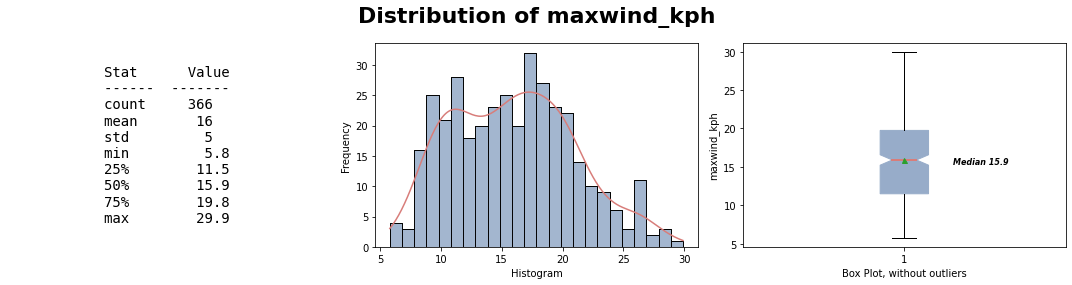

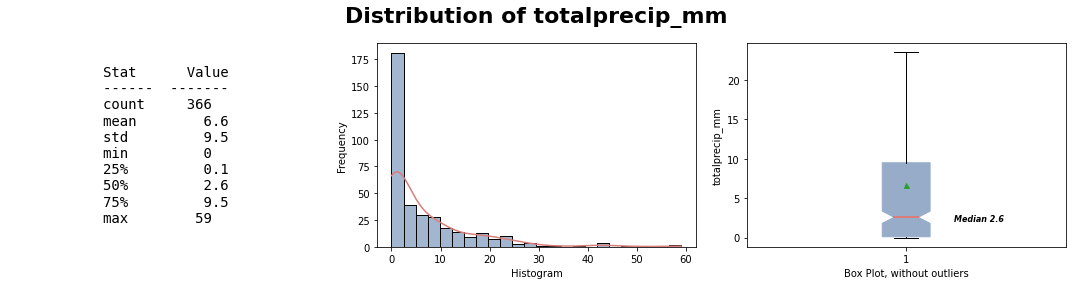

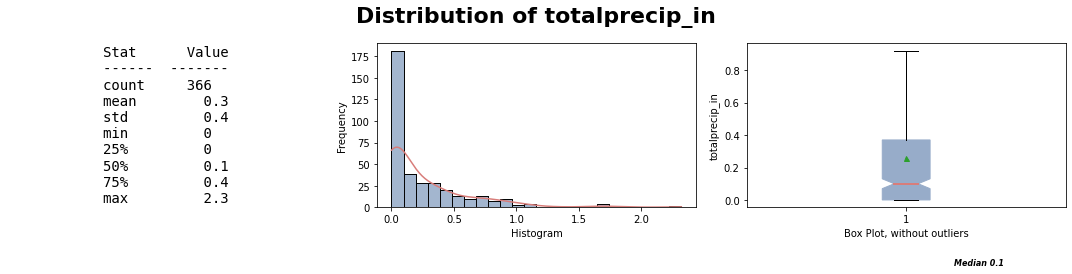

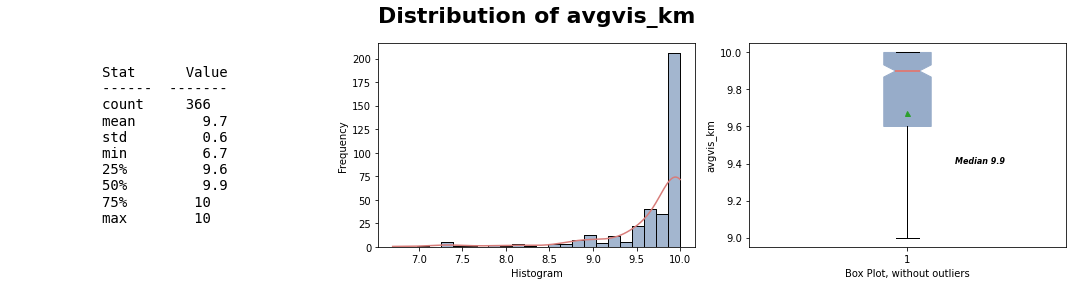

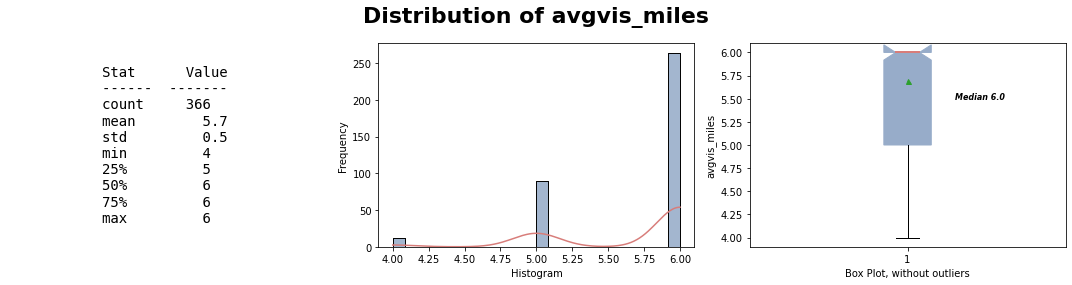

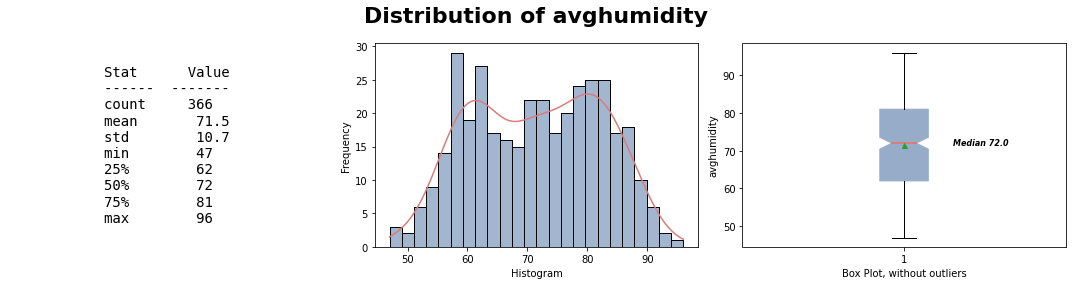

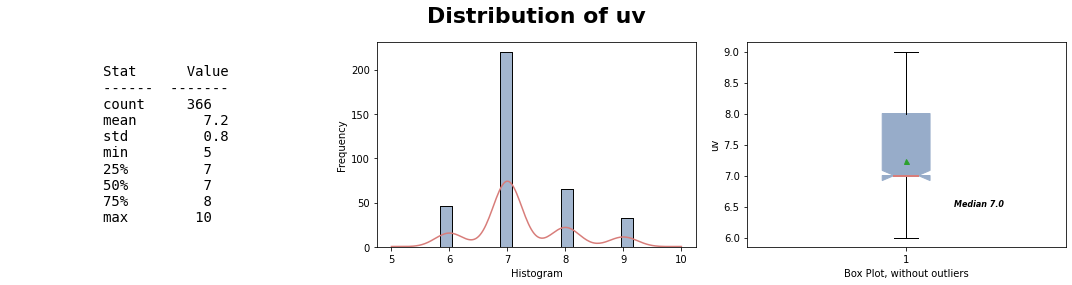

List of categorical columns:  ['name', 'country', 'lat', 'lon', 'tz_id', 'condition', 'is_rain']


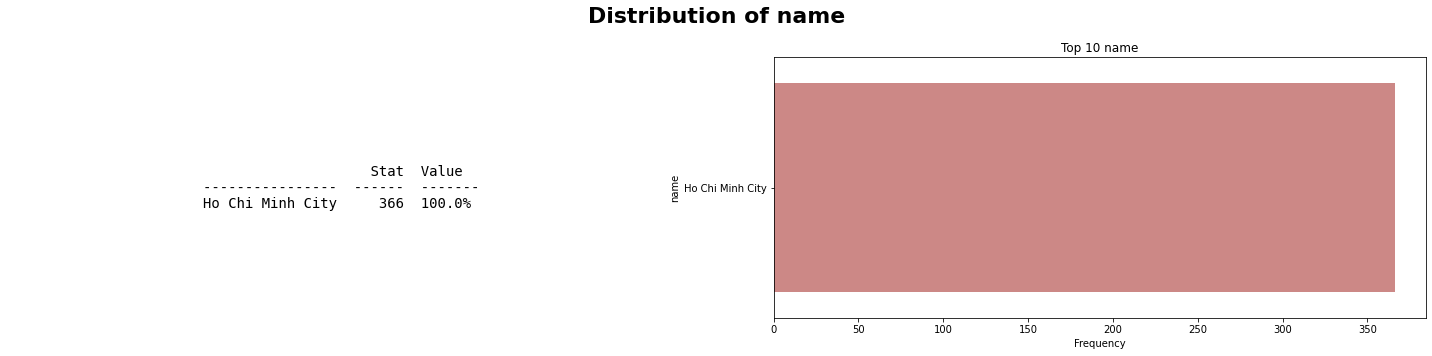

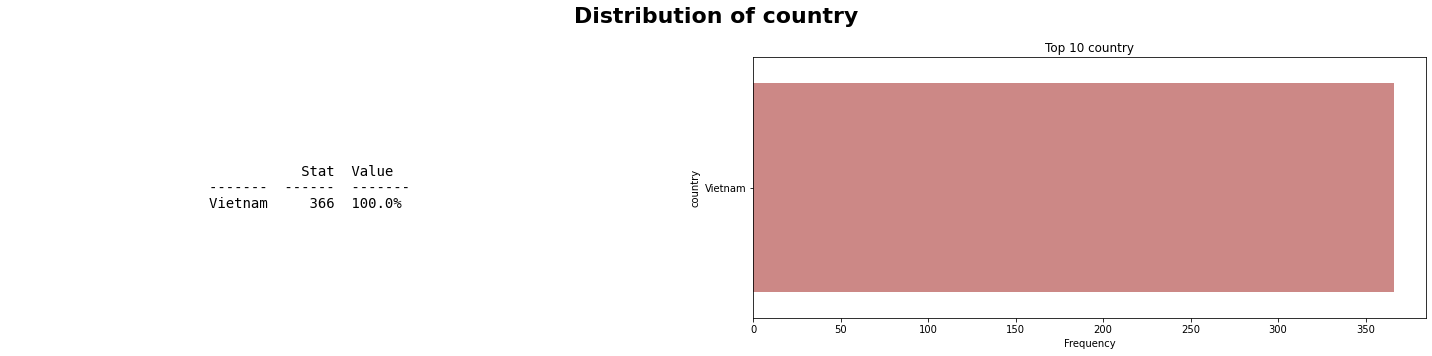

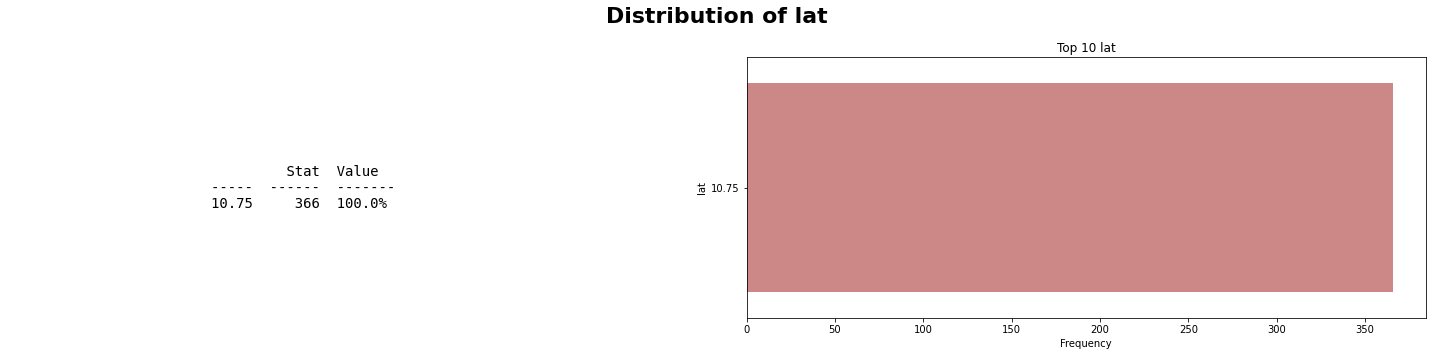

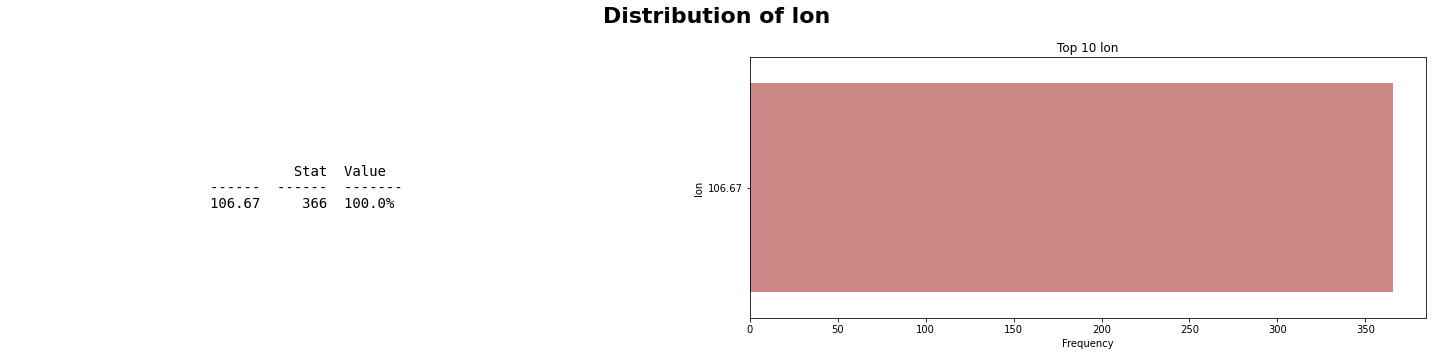

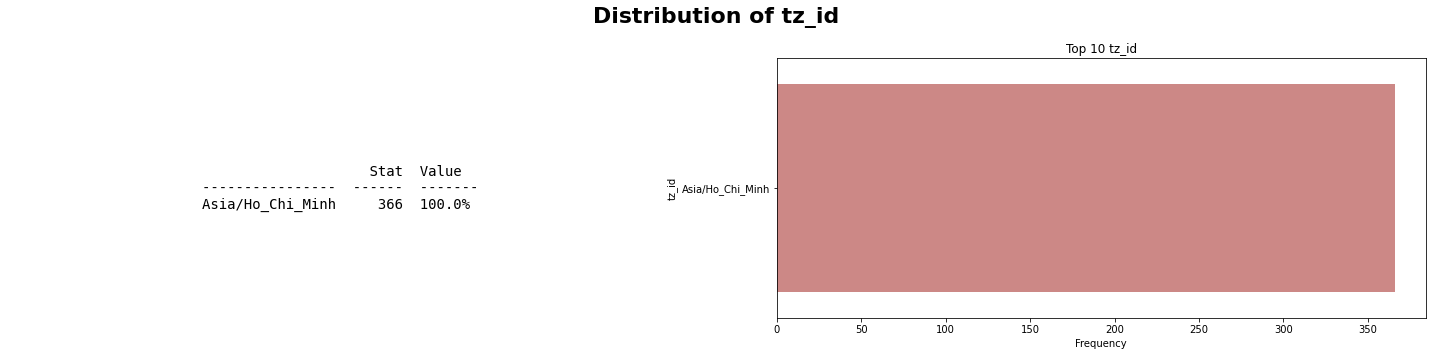

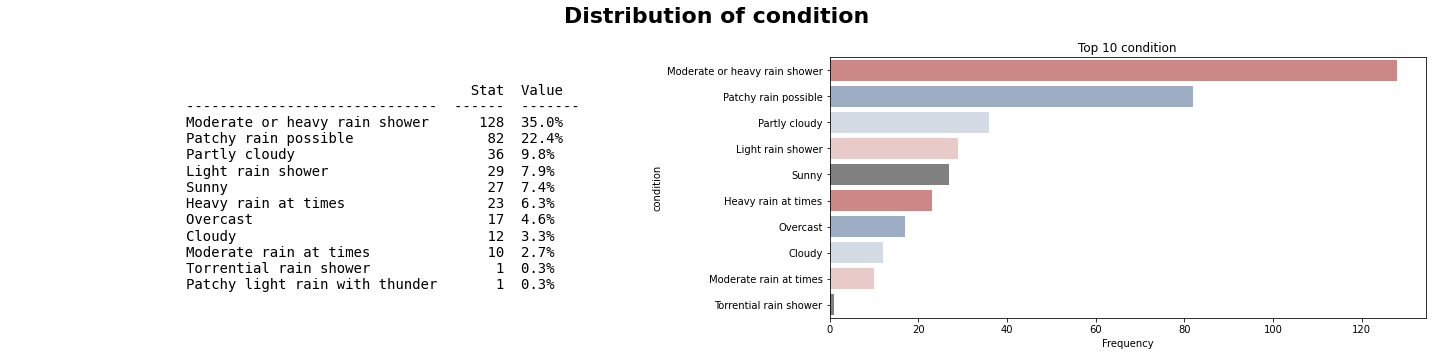

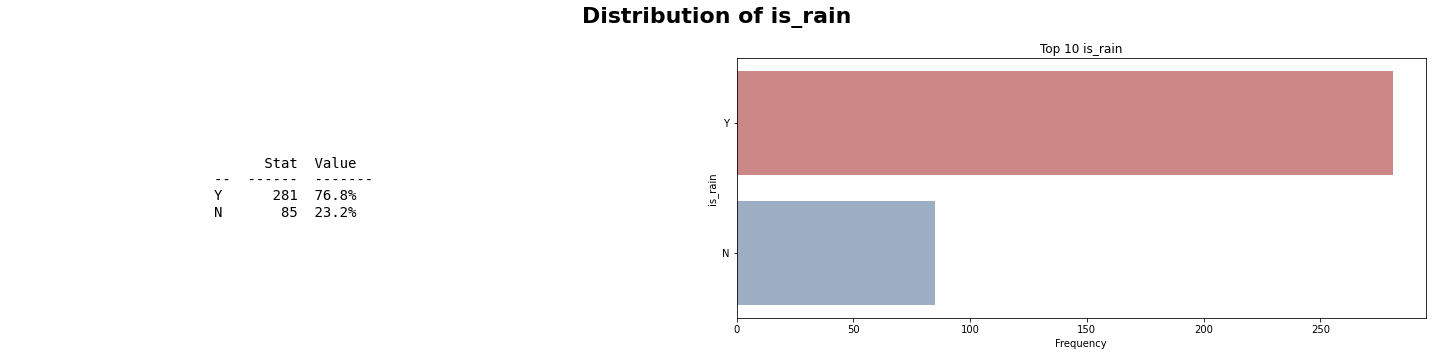

In [58]:
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)
print('List of numerical columns: ', numerical_columns)

# Show the results
Uni_analysis_num_cols(day_weather)

# Show the results
print('List of categorical columns: ',categorical_columns)
Uni_analysis_cate_cols(day_weather)

# Part II - Weather Prediction

## 1. Create a model to estimate temperature - Maximum temperature in Celsius
------
Creating a model to estimate the maximum, minimum, and average temperatures for the next 30 days typically involves time series forecasting. Time series forecasting is a common approach for predicting future values based on historical data. In this case, historical weather data can be used to train a forecasting model. Here's a high-level overview of the steps to create such a model:


### Step 1. Import dataset

In [59]:
# Select the 'date' and 'maxtemp_c' columns
data = day_weather[['date', 'maxtemp_c']]

# Set 'date' as the index
data.set_index('date', inplace=True)

### Step 2. Exploratory Analysis

In [60]:
# Create a function to inspect the first 5 rows and the last 5 rows from the data
from IPython.display import display

# show the earliest 5 days and the last 5 days
def inspect_data(data):
    display(data.head(5))
    display(data.tail(5))

# showw the max and min values
def output_max_min_values(data):
    print(data[(data == data.values.max()).any(axis=1)])
    print(data[(data == data.values.min()).any(axis=1)])

# Visualize the daily change of temperature varibles
def plot_daily_change(data):
    plt.figure(figsize = (15,5))
    plt.plot(data.index, data.iloc[:,0], color ='r')
    title = 'Plot the daily change of ' + str(data.columns[0])
    #plt.gca().set(title='Plot the daily change', xlabel ='Date', ylabel = data.columns[0] )
    plt.gca().set(title=title, xlabel ='Date', ylabel = data.columns[0] )
    plt.show()

# Visualize the Moving average n days
def plot_Moving_Avg_n_days(data, n):
    data_mean = pd.DataFrame(data.iloc[:,0].rolling(window=30).mean())
    plt.figure(figsize = (15,5))
    plt.plot(data_mean.index,data_mean.iloc[:,0],color='b')
    
# Additvie Decomposition    
def additive_decomposition(data):
    result_add = seasonal_decompose(data.iloc[:,0],model='additive', extrapolate_trend='freq', period=7)
    
    # Plot
    plt.rcParams.update({'figure.figsize':(10,10)})
    result_add.plot().suptitle('Additive Decomposition', fontsize=22)

,maxtemp_c
date,
2022-10-17,31.3
2022-10-18,30.1
2022-10-19,28.8
2022-10-20,28.0
2022-10-21,32.0


,maxtemp_c
date,
2023-10-13,32.6
2023-10-14,32.1
2023-10-15,27.9
2023-10-16,26.1
2023-10-17,30.0


            maxtemp_c
date                 
2023-03-17       40.1
            maxtemp_c
date                 
2022-11-20       24.2


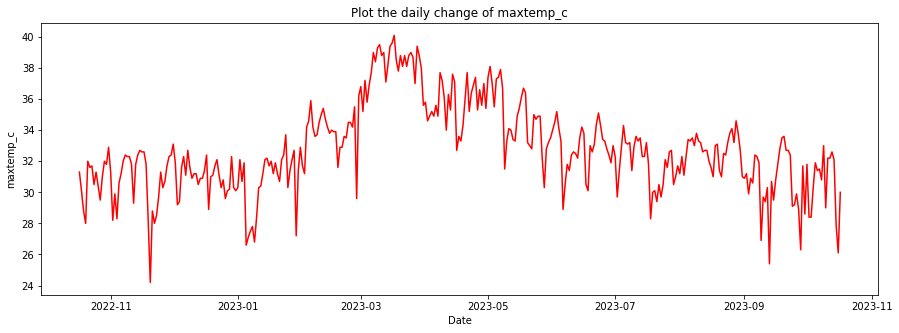

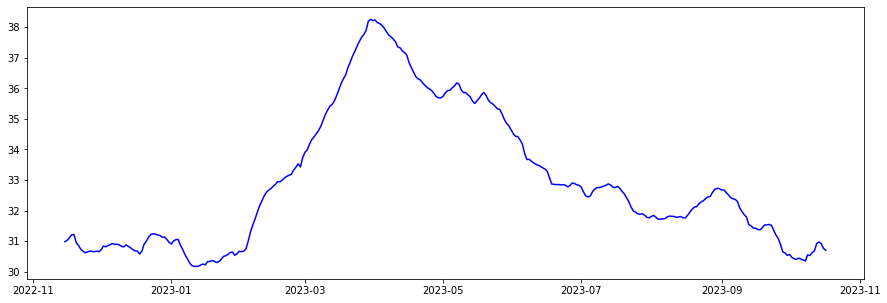

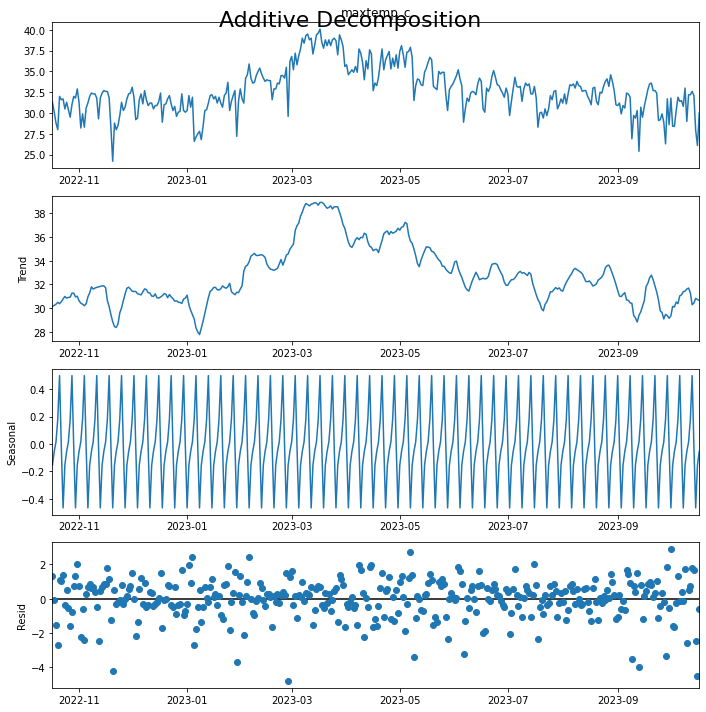

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
inspect_data(data)
output_max_min_values(data)
plot_daily_change(data)
plot_Moving_Avg_n_days(data, 30)
additive_decomposition(data)

### Step 3. Create a Baseline Model
We use 1-step prediction to model the temperature as a time series
and validate the model by the Root Mean Squared Error (RMSE)


In [67]:
def create_baseline_model(data):
    """
    Predict the weather based on an assumption: The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on.
    So, we use 1-step prediction to model the temperature as a time series
    """
    # ==== Step 1: Create a Baseline Model ====
    # Shift the current value to the next day
    data_pred = data.columns[0] + '_pred'
    data_acrual = data.columns[0] + '_actual'
    predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
    actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
    # Concate the actual and predicted variable
    one_step_df = pd.concat([predicted_df,actual_df],axis=1)
    
    # Select from the second row, because there is no prediction for today due to shifting
    one_step_df = one_step_df[1:]
    print('==== Baseline Model ====')
    print('-----------------------------------------------------------')
    print('Step 1: Create a Baseline Model and show the first 5 values')
    print(one_step_df.head(5))
    
    # ==== Step 2: Validate the model by RMSE (Root Mean Squared Error)
    # Calculate the RMSE
    temp_pred_err = MSE(one_step_df.iloc[:,1],one_step_df.iloc[:,0], squared=False)
    print('   ')
    print('-----------------------------------------------------------')
    print('Step 2: Validate the model by RMSE')
    print('The RSME is',round(temp_pred_err,2))
    print('Comment:')
    print( '- The RMSE is small, meaning that 1-step prediction baseline model has the average error')
    print('  of only {} units'.format(round(temp_pred_err,2)))

In [68]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

create_baseline_model(data)

==== Baseline Model ====
-----------------------------------------------------------
Step 1: Create a Baseline Model and show the first 5 values
            maxtemp_c_pred  maxtemp_c_actual
date                                        
2022-10-18            31.3              30.1
2022-10-19            30.1              28.8
2022-10-20            28.8              28.0
2022-10-21            28.0              32.0
2022-10-22            32.0              31.6
   
-----------------------------------------------------------
Step 2: Validate the model by RMSE
The RSME is 1.64
Comment:
- The RMSE is small, meaning that 1-step prediction baseline model has the average error
  of only 1.64 units


### Step 4. Weather Forecast using SARIMA model -- Maximum temperature variable
We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend and noise in data:

We will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMA() function from the statsmodels module and assess its overall quality.

In [69]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
from datetime import datetime

In [70]:
# ==== Step 1: Create a Baseline Model ====
# Shift the current value to the next day
data_pred = data.columns[0] + '_pred'
data_acrual = data.columns[0] + '_actual'
predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
# Concate the actual and predicted variable
one_step_df = pd.concat([predicted_df,actual_df],axis=1)

In [71]:

# define the p, d, and q parameters to take any value between 0 and 2
p = d = q = range(0,2)
    
    # Generate all different combinations of ap, d, and q triplets
pdq = list(itertools.product(p,d,q))
    
    # Generate all differnet combination of seasonal p, d, and q triples
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
    
    # initial AIC
min_param= pdq[0]
min_param_seasonal = seasonal_pdq[0]
min_mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                        order = min_param,
                                        seasonal_order = min_param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
min_result = min_mod.fit()
min_param_aic = min_result.aic
print('The base parameters for SARIMA is SARIMA{}X{}12 - AIC: {}'.format(min_param, min_param_seasonal, round(min_param_aic,2)))

The base parameters for SARIMA is SARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC: 3587.8


In [72]:
# find the optimal combination of parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try: 
            print
            mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                                order = param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
            results = mod.fit()
                
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
            if min_param_aic > results.aic:
                min_param_aic = results.aic
                min_param = param
                min_param_seasonal = param_seasonal
        except:
                continue
print('The min AIC value is {}'.format(min_param_aic))
print(' ')
print('=> The AIC measures how well a model fits the data. The output suggests that SARIMA{}X{}12 yields the lowest AIC value of {}'.format(min_param, min_param_seasonal, round(min_param_aic,2)))

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3587.8048654849663
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3061.4117695137857
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1655.2279322876786
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1542.43126149494
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1660.5569222343354
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1599.832104417746
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1549.7498373840472
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1547.4821473926925
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3113.4706080127617
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2648.888008529957
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1555.6633319569557
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1419.8223752805893
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1564.4863365357573
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1475.871832007051
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1440.4304818636901
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1426.6264366983019
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1395.33263110398
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:

 
-----------------------------------------------------------
Step 2: Fitting the Model
SARIMA model is created
 
-----------------------------------------------------------
Step 3: Model Diagnostics
The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior
Comment: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.
 


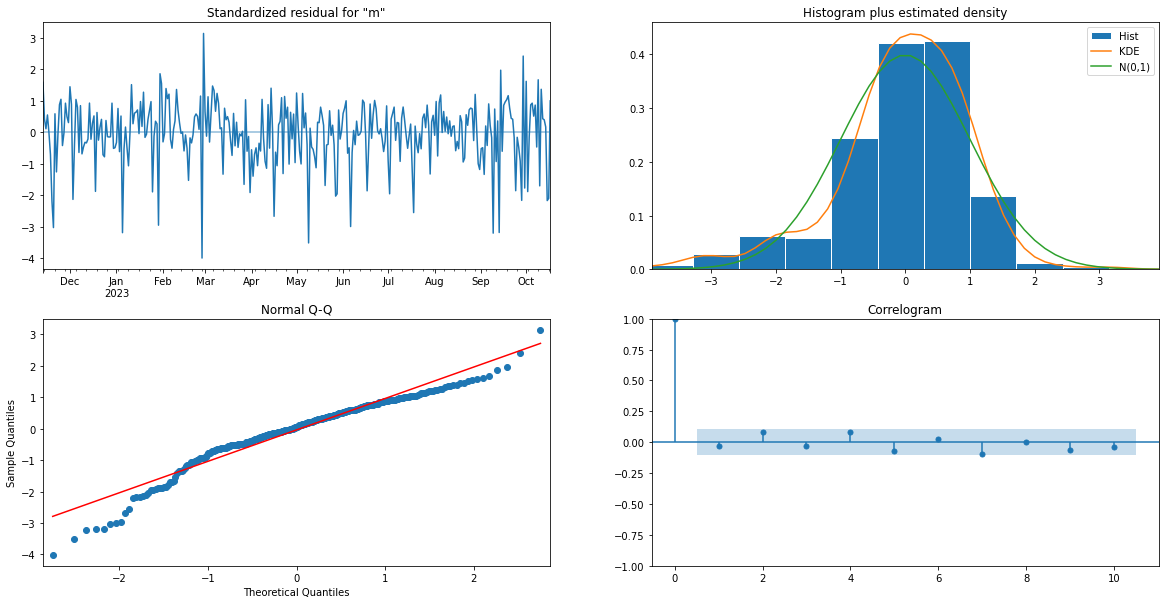

In [73]:
 # Step 2: Fitting the model
print(' ')
print('-----------------------------------------------------------')
print('Step 2: Fitting the Model')
    
#mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                    #order = min_param,
                                    #order_seasonal = min_param_seasonal,
                                    #enforce_stationarity = False,
                                    #enforce_invertibility=False)

# Fit the SARIMA model using the optimal parameters
#mod = sm.tsa.statespace.SARIMAX(one_step_df.maxtemp_c_actual,
                              # order=(1,1,1),
                               #seasonal_order=(0,1,1,12),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False)

mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                               order=min_param,
                               seasonal_order=min_param_seasonal,
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results = mod.fit()

print('SARIMA model is created')
    
    # Step 3: Model Diagnostics
print(' ')
print('-----------------------------------------------------------')
print('Step 3: Model Diagnostics')
print('The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior')
print('Comment: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.')
print(' ')

results.plot_diagnostics(figsize=(20,10))
plt.show()



 
-----------------------------------------------------------
Step 4: Validating the Forecast
Overal, the forecasts align with the true values quite well


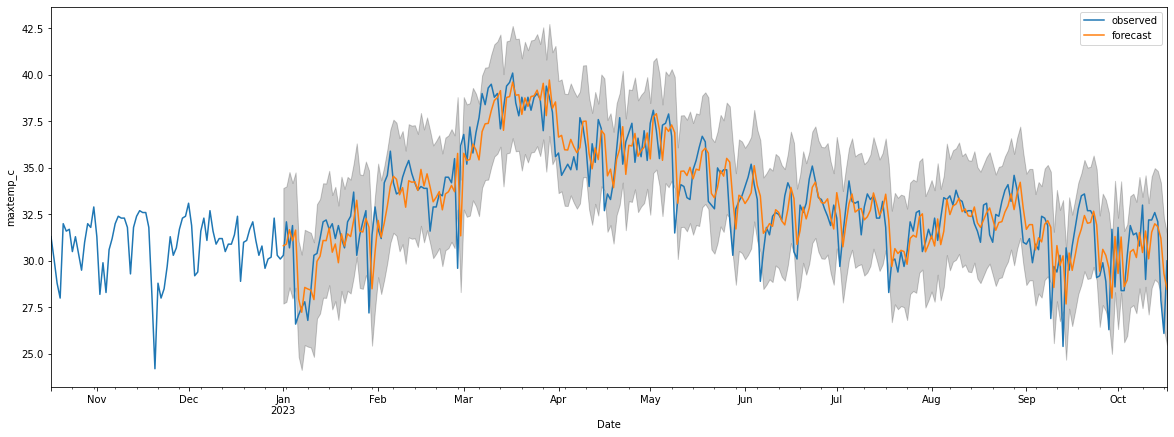

 
-----------------------------------------------------------
Step 5: Compute the Mean Squared Error of the forecasts
 The MSE of the forecasts is 2.42


In [74]:
 # Step 4: Validating the Non_Dynamic Forecast
print(' ')
print('-----------------------------------------------------------')
print('Step 4: Validating the Forecast')
print('Overal, the forecasts align with the true values quite well')
pred = results.get_prediction(start=pd.to_datetime('2023-01-01'),dynamic=False)
pred_ci = pred.conf_int()
    
# plot the real adn forecasted values
ax = one_step_df.iloc[:,1].plot(label='observed', figsize=(20,7))
pred.predicted_mean.plot(ax=ax, label ='forecast') 
    
ax.fill_between (pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel(data.columns[0])
plt.legend()
plt.show()

# Step 5: Forecast Diagnostic
print(' ')
print('-----------------------------------------------------------')
print('Step 5: Compute the Mean Squared Error of the forecasts')
y_forecasted = pred.predicted_mean
y_truth = one_step_df.iloc[:,1]['2023-01-01':]
    
# Compute the MSE
mse = MSE(y_truth, y_forecasted,squared=True)
print(' The MSE of the forecasts is {}'.format(round(mse,2)))

In [75]:
 # Step 6: Forecast next 30 days 
print(' ')
print('-----------------------------------------------------------')
print('Step 6: Forecast next 30 days')
# Define the periods
forecast_periods = 30
    
# Get the forecast for the future periods
forecast = results.get_forecast(steps = forecast_periods)
    
# Set forecast index
forecast_start_date = one_step_df.index[-1] + pd.Timedelta(days=1) # Assuming daily frequency
forecast_end_date = forecast_start_date + pd.DateOffset(days=forecast_periods -1)
forecast_index = pd.date_range(forecast_start_date, forecast_end_date)
    
# extract forecasted values and confidence intervals
forecasted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
    
# Set the forecasted values and confident intervals index to the forecast_index
forecasted_values.index = forecast_index
confidence_intervals.index = forecast_index

 
-----------------------------------------------------------
Step 6: Forecast next 30 days


file csv of forecasted values is created


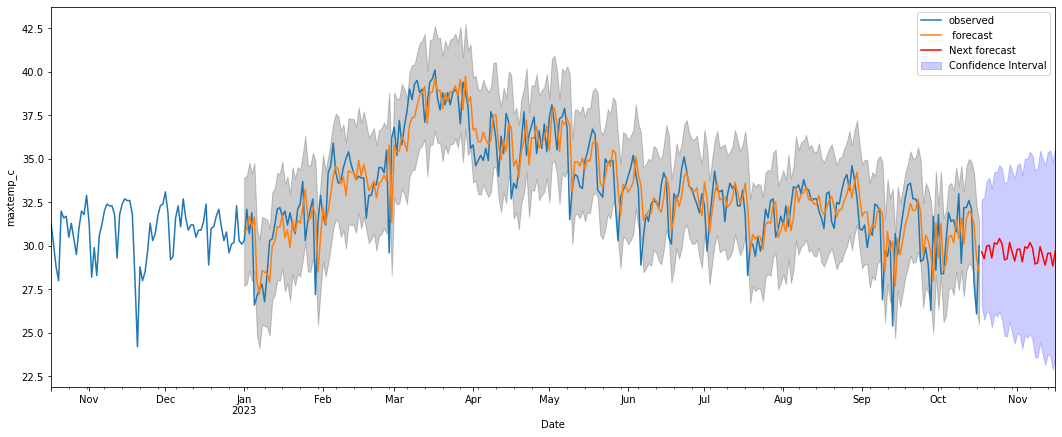

In [76]:
 # Export the DataFrame to a CSV file
start_dt = forecast_index[0].strftime("%d_%m_%y")
end_dt = forecast_index[-1].strftime("%d_%m_%y")
file_name = data.columns[0] + '_forecasted_values' +'_from_' + start_dt + '_to_' + end_dt + '.csv'
forecasted_values.to_csv(file_name, index=False)
print('file csv of forecasted values is created')

# Visualize the results
ax = one_step_df.iloc[:,1].plot(label = 'observed', figsize=(18,7))
pred.predicted_mean.plot(label =' forecast')
forecasted_values.plot(label='Next forecast', color = 'red')
    
# Plot the forecasted values
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color= 'k', alpha=.2)
    
# Plot the forecast values of next 30 days
ax.fill_between(confidence_intervals.index
               , confidence_intervals.iloc[:, 0]
                , confidence_intervals.iloc[:, 1], color='b', alpha=.2
                , label='Confidence Interval')
ax.set_xlabel("Date")
ax.set_ylabel(data.columns[0])
plt.legend()
plt.show()

## 2. Building simulation weather forecast

### Step 1: Create funtion to extract the forecasted values of numerical feature by using SARIMA model
----

In [84]:
def export_forcased_values_from_SARIMA_model(data):
    
    # use Grid Search to find the optimal combination of parameters for SARIMA model 
    # ==== Step 1: Create a Baseline Model ====
    # Shift the current value to the next day
    data_pred = data.columns[0] + '_pred'
    data_acrual = data.columns[0] + '_actual'
    predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
    actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
    # Concate the actual and predicted variable
    one_step_df = pd.concat([predicted_df,actual_df],axis=1)
    
    # define the p, d, and q parameters to take any value between 0 and 2
    p = d = q = range(0,2)
    
    # Generate all different combinations of ap, d, and q triplets
    pdq = list(itertools.product(p,d,q))
    
    # Generate all differnet combination of seasonal p, d, and q triples
    seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
    
    # initial AIC
    min_param= pdq[0]
    min_param_seasonal = seasonal_pdq[0]
    min_mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                        order = min_param,
                                        seasonal_order = min_param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    min_result = min_mod.fit()
    min_param_aic = min_result.aic
          
    # find the optimal combination of parameters
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try: 
                print
                mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                                order = param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                
                #print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
                if min_param_aic > results.aic:
                    min_param_aic = results.aic
                    min_param = param
                    min_param_seasonal = param_seasonal
            except:
                continue

    # Step 2: Fitting the model
    
    mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                               order=min_param,
                               seasonal_order=min_param_seasonal,
                               enforce_stationarity=False,
                               enforce_invertibility=False)

    results = mod.fit()
    
    # Step 6: Forecast next 30 days 
    # Define the periods
    forecast_periods = 30
    
    # Get the forecast for the future periods
    forecast = results.get_forecast(steps = forecast_periods)
    
    # Set forecast index
    forecast_start_date = one_step_df.index[-1] + pd.Timedelta(days=1) # Assuming daily frequency
    forecast_end_date = forecast_start_date + pd.DateOffset(days=forecast_periods -1)
    forecast_index = pd.date_range(forecast_start_date, forecast_end_date)
    
    # extract forecasted values and confidence intervals
    forecasted_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    # Set the forecasted values and confident intervals index to the forecast_index
    forecasted_values.index = forecast_index
    confidence_intervals.index = forecast_index
    
    # Export the DataFrame to a CSV file
    #forecasted_values.to_csv(file_name, index=False)
    return forecasted_values

### Step 2. Create a new DataFrame for forecasted values
----

In [92]:
# Define the start date for forecasting (1 day after the last date in the dataset)
forecast_start_date = day_weather['date'].max() + pd.Timedelta(days=1)
forecast_start_date

# Create a date range for the next 30 days
forecast_end_date = forecast_start_date + pd.DateOffset(days=29)
forecast_dates = pd.date_range(forecast_start_date, forecast_end_date, freq='D')

# Create a new DataFrame with the same values for ['name', 'country', 'lat', 'lon', 'tz_id']
forecast_data = pd.DataFrame({
    'date': forecast_dates,
    'name': day_weather['name'].iloc[0],
    'country': day_weather['country'].iloc[0],
    'lat': day_weather['lat'].iloc[0],
    'lon': day_weather['lon'].iloc[0],
    'tz_id': day_weather['tz_id'].iloc[0]
})

# Add the forecasted dates to the new DataFrame
forecasted_features = ['maxtemp_c','maxtemp_f','mintemp_c','mintemp_f','avgtemp_c','avgtemp_f','maxwind_mph','maxwind_kph','totalprecip_mm','totalprecip_in','avgvis_km','avgvis_miles','avghumidity','condition','uv','is_rain']
for feature in forecasted_features:
    forecast_data[feature] = np.nan
    
# Set the 'date' column as the new index   
forecast_data.set_index('date', inplace=True)
forecast_data.head(5)

,name,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,...,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv,is_rain
date,,,,,,,,,,,,,,,,,,,,,
2023-10-18,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-19,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-20,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-21,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-22,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
print(forecasted_features)

['maxtemp_c', 'maxtemp_f', 'mintemp_c', 'mintemp_f', 'avgtemp_c', 'avgtemp_f', 'maxwind_mph', 'maxwind_kph', 'totalprecip_mm', 'totalprecip_in', 'avgvis_km', 'avgvis_miles', 'avghumidity', 'condition', 'uv', 'is_rain']


### Step 3. make the prediction and add forecasted values to 'forecast_data
----

In [95]:
start_dt = forecast_index[0].strftime("%d_%m_%y")
end_dt = forecast_index[-1].strftime("%d_%m_%y")

for col in numerical_columns:
    data = day_weather[['date', col]]

    # Set 'date' as the index
    data.set_index('date', inplace=True)
    
    file_name = data.columns[0] + '_forecasted_values' +'_from_' + start_dt + '_to_' + end_dt 
    forcased_value = export_forcased_values_from_SARIMA_model(data)
    forecast_data[col] = forcased_value
    print('{} created'.format(file_name))

maxtemp_c_forecasted_values_from_18_10_23_to_16_11_23 created
maxtemp_f_forecasted_values_from_18_10_23_to_16_11_23 created
mintemp_c_forecasted_values_from_18_10_23_to_16_11_23 created
mintemp_f_forecasted_values_from_18_10_23_to_16_11_23 created
avgtemp_c_forecasted_values_from_18_10_23_to_16_11_23 created
avgtemp_f_forecasted_values_from_18_10_23_to_16_11_23 created
maxwind_mph_forecasted_values_from_18_10_23_to_16_11_23 created
maxwind_kph_forecasted_values_from_18_10_23_to_16_11_23 created
totalprecip_mm_forecasted_values_from_18_10_23_to_16_11_23 created
totalprecip_in_forecasted_values_from_18_10_23_to_16_11_23 created
avgvis_km_forecasted_values_from_18_10_23_to_16_11_23 created
avgvis_miles_forecasted_values_from_18_10_23_to_16_11_23 created
avghumidity_forecasted_values_from_18_10_23_to_16_11_23 created
uv_forecasted_values_from_18_10_23_to_16_11_23 created


In [96]:
forecast_data.head(5)

,name,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,...,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv,is_rain
date,,,,,,,,,,,,,,,,,,,,,
2023-10-18,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.666073,85.376105,24.242401,75.926651,26.520060,...,7.164726,11.576261,13.163440,0.455647,9.154541,5.079092,86.814340,NaN,6.326128,NaN
2023-10-19,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.266780,84.685890,24.365772,75.858318,26.625483,...,7.313963,11.564315,12.035446,0.426148,9.197497,5.042457,88.394921,NaN,6.393784,NaN
2023-10-20,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.991939,85.965005,24.411022,75.598944,26.644250,...,7.357301,11.703070,11.776730,0.395505,8.991849,4.945101,86.168120,NaN,6.408702,NaN
2023-10-21,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.029709,86.019917,24.401164,75.717015,26.824096,...,8.073255,12.424363,10.615579,0.497537,9.065536,4.936566,85.135145,NaN,6.411415,NaN
2023-10-22,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.306140,84.745011,24.376336,75.781979,26.566704,...,6.794467,10.738892,12.443038,0.441314,9.085322,4.996840,88.285870,NaN,6.409792,NaN


### Step 4. Extract forecasted values from categorical feature:
------
Creating a model to estimate the categorical feature: 'weather condition' and 'is-rain'


### 4.1 Forcasted 'weather condition'

### Build a basic XGBoost Model

In [171]:
# Step 1: Import neccesary librabries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

# Copy the data source
day_weather_df = day_weather.copy()

#  Step 2: Encode the 'condition' column with numerical labels
label_encoder = LabelEncoder()
day_weather_df['condition_encoded'] = label_encoder.fit_transform(day_weather_df['condition'])

# Step 3: Define your features and target
features_list_to_drop = ['name','country','lat','lon','tz_id','condition','condition_encoded','date','is_rain']
	
X = day_weather_df.drop(features_list_to_drop, axis=1)
y = day_weather_df['condition_encoded']

# Step 4: Split the data into training and testing sets
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_XGB, y_train_XGB)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_XGB)

# Decode the predictions back to original labels
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions)

# Calculate accuracy scores
xgb_accuracy = accuracy_score(y_test_XGB, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')

[22:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 0.6621621621621622


### Improve the Model
To use K-Fold cross-validation to build an optimal XGBoost model, you need to perform hyperparameter tuning during the cross-validation process. 

#### 1. Find the best model

In [173]:
# Define the hyperparameters grid for XGBoost.

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
             'learning_rate': [0.05, 0.1, 0.2]
             }

# Create a K-Fold cross-validation iterator
num_folds = 5  # Number of cross-validation folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a GridSearchCV object to perform hyperparameter tuning within each fold
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='neg_mean_squared_error')

# Iteration through the folds, perform hyperparameter tuning, and train XGBoost models with optimal hyperparameters

best_models = []  # Store the best models for each fold

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform hyperparameter tuning using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model with optimal hyperparameters
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Train the best model on the full training data
    best_model.fit(X_train, y_train)
    
# Evaluate the performance of optimal models and select the best one
best_mse = np.inf
best_model = None

for model in best_models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_model = model

print("Best Model MSE:", best_mse)

Best Model MSE: 1.5737694519068277


Now we have a trained XGBoost model with optimal hyperparameters selected through K-Fold cross-validation. This model should provide improved performance compared to using default hyperparameters.

In [174]:
# Calculate the mean of the true target values (y)
y_mean = y.mean()

# Calculate the variance of the true target values (y)
variance_y = ((y - y_mean) ** 2).mean()

# Calculate the accuracy
accuracy = 1 - best_mse / variance_y

print("Accuracy:", accuracy)

Accuracy: 0.7829799707028217


#### 2. Forecast weather condition on the new forecasted data

In [181]:
# Copy the data source
forecast_data_copy = forecast_data.copy()

# Step 3: Define your features and target
features_list_to_drop = ['name','country','lat','lon','tz_id','condition','is_rain']

forecasted_X= forecast_data_copy.drop(features_list_to_drop, axis=1)
forecasted_y = forecast_data_copy['condition']

# Make predictions
xgb_predictions_best = best_model.predict(forecasted_X)

# Decode the predictions back to original 'condition' labels
xgb_predictions_best = np.round(xgb_predictions_best,0).astype(int)
xgb_predictions_best_decoded = label_encoder.inverse_transform(xgb_predictions_best)

# Add to forecasted model
forecast_data['condition'] = xgb_predictions_best_decoded
forecast_data.head(5)

,name,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,...,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv,is_rain
date,,,,,,,,,,,,,,,,,,,,,
2023-10-18,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.666073,85.376105,24.242401,75.926651,26.520060,...,7.164726,11.576261,13.163440,0.455647,9.154541,5.079092,86.814340,Moderate or heavy rain shower,6.326128,NaN
2023-10-19,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.266780,84.685890,24.365772,75.858318,26.625483,...,7.313963,11.564315,12.035446,0.426148,9.197497,5.042457,88.394921,Moderate or heavy rain shower,6.393784,NaN
2023-10-20,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.991939,85.965005,24.411022,75.598944,26.644250,...,7.357301,11.703070,11.776730,0.395505,8.991849,4.945101,86.168120,Moderate or heavy rain shower,6.408702,NaN
2023-10-21,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.029709,86.019917,24.401164,75.717015,26.824096,...,8.073255,12.424363,10.615579,0.497537,9.065536,4.936566,85.135145,Moderate or heavy rain shower,6.411415,NaN
2023-10-22,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.306140,84.745011,24.376336,75.781979,26.566704,...,6.794467,10.738892,12.443038,0.441314,9.085322,4.996840,88.285870,Moderate or heavy rain shower,6.409792,NaN


### 4.2 Forcasted 'is rain'

### Build a basic XGBoost Model

In [207]:
# Step 1: Copy the data source
day_weather_df = day_weather.copy()

#  Step 2: Encode the 'condition' column with numerical labels
label_encoder_2 = LabelEncoder()
day_weather_df['is_rain_encoded'] = label_encoder_2.fit_transform(day_weather_df['is_rain'])

# Step 3: Define your features and target
features_list_to_drop = ['name','country','lat','lon','tz_id','condition','condition_encoded','date','is_rain','is_rain_encoded']
	
X = day_weather_df.drop(features_list_to_drop, axis=1)
y = day_weather_df['is_rain_encoded']

# Step 4: Split the data into training and testing sets
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_XGB, y_train_XGB)

# Make predictions
xgb_predictions = xgb_model.predict(X_test_XGB)

# Decode the predictions back to original labels
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions)

# Calculate accuracy scores
xgb_accuracy = accuracy_score(y_test_XGB, xgb_predictions)
print(f'XGBoost Accuracy: {xgb_accuracy}')

[23:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy: 1.0


In [208]:
# Make predictions
xgb_predictions = xgb_model.predict(X_test_XGB)
# Decode the predictions back to original labels
xgb_predictions_decoded = label_encoder.inverse_transform(xgb_predictions)
xgb_predictions_decoded

array(['Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

### Improve the Model
To use K-Fold cross-validation to build an optimal XGBoost model, you need to perform hyperparameter tuning during the cross-validation process. 

#### 1. Find the best model

In [209]:
# Define the hyperparameters grid for XGBoost.

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
             'learning_rate': [0.05, 0.1, 0.2]
             }

# Create a K-Fold cross-validation iterator
num_folds = 5  # Number of cross-validation folds
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize a GridSearchCV object to perform hyperparameter tuning within each fold
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=kf, scoring='neg_mean_squared_error')

# Iteration through the folds, perform hyperparameter tuning, and train XGBoost models with optimal hyperparameters

best_models = []  # Store the best models for each fold

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform hyperparameter tuning using GridSearchCV
    grid_search.fit(X_train, y_train)

    # Get the best model with optimal hyperparameters
    best_model = grid_search.best_estimator_
    best_models.append(best_model)

    # Train the best model on the full training data
    best_model.fit(X_train, y_train)
    
# Evaluate the performance of optimal models and select the best one
best_mse = np.inf
best_model = None

for model in best_models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_model = model

print("Best Model MSE:", best_mse)

Best Model MSE: 2.656172322878706e-09


Now we have a trained XGBoost model with optimal hyperparameters selected through K-Fold cross-validation. This model should provide improved performance compared to using default hyperparameters.

In [210]:
# Calculate the mean of the true target values (y)
y_mean = y.mean()

# Calculate the variance of the true target values (y)
variance_y = ((y - y_mean) ** 2).mean()

# Calculate the accuracy
accuracy = 1 - best_mse / variance_y

print("Accuracy:", accuracy)

Accuracy: 0.9999999851031937


#### 2. Forecast weather condition on the new forecasted data

In [212]:
# Copy the data source
forecast_data_copy = forecast_data.copy()

# Step 3: Define your features and target
features_list_to_drop = ['name','country','lat','lon','tz_id','condition','is_rain']

forecasted_X= forecast_data_copy.drop(features_list_to_drop, axis=1)
forecasted_y = forecast_data_copy['is_rain']

# Make predictions
xgb_predictions_best = best_model.predict(forecasted_X)

# Decode the predictions back to original 'condition' labels
xgb_predictions_best = np.round(xgb_predictions_best,0).astype(int)
xgb_predictions_best_decoded = label_encoder.inverse_transform(xgb_predictions_best)

# Add to forecasted model
forecast_data['is_rain'] = xgb_predictions_best_decoded
forecast_data.head(5)

,name,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,...,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv,is_rain
date,,,,,,,,,,,,,,,,,,,,,
2023-10-18,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.666073,85.376105,24.242401,75.926651,26.520060,...,7.164726,11.576261,13.163440,0.455647,9.154541,5.079092,86.814340,Moderate or heavy rain shower,6.326128,Y
2023-10-19,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.266780,84.685890,24.365772,75.858318,26.625483,...,7.313963,11.564315,12.035446,0.426148,9.197497,5.042457,88.394921,Moderate or heavy rain shower,6.393784,Y
2023-10-20,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.991939,85.965005,24.411022,75.598944,26.644250,...,7.357301,11.703070,11.776730,0.395505,8.991849,4.945101,86.168120,Moderate or heavy rain shower,6.408702,Y
2023-10-21,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.029709,86.019917,24.401164,75.717015,26.824096,...,8.073255,12.424363,10.615579,0.497537,9.065536,4.936566,85.135145,Moderate or heavy rain shower,6.411415,Y
2023-10-22,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.306140,84.745011,24.376336,75.781979,26.566704,...,6.794467,10.738892,12.443038,0.441314,9.085322,4.996840,88.285870,Moderate or heavy rain shower,6.409792,Y


In [217]:
file_name = 'forecasted data from 18_10 to 16_11'+ '.csv'
forecast_data.to_csv(file_name, index=False)

## Step 5. Combination forecast_data to the original dataset
----

In [213]:
# Khoan lam
combined_data = pd.concat([day_weather, forecast_data])
combined_data.tail(35)

,date,name,country,lat,lon,tz_id,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,...,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv,is_rain,condition_encoded
362,2023-10-13,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,32.600000,90.600000,24.700000,76.400000,...,10.100000,9.170000,0.360000,9.600000,5.000000,82.000000,Light rain shower,7.000000,Y,2.0
363,2023-10-14,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,32.100000,89.700000,25.100000,77.100000,...,7.900000,22.780000,0.900000,9.500000,5.000000,84.000000,Moderate or heavy rain shower,7.000000,Y,3.0
364,2023-10-15,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,27.900000,82.300000,24.800000,76.600000,...,11.200000,9.480000,0.370000,9.600000,5.000000,88.000000,Light rain shower,6.000000,Y,2.0
365,2023-10-16,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,26.100000,79.000000,24.200000,75.600000,...,6.800000,16.680000,0.660000,9.100000,5.000000,93.000000,Light rain shower,6.000000,Y,2.0
366,2023-10-17,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.000000,86.000000,24.000000,75.300000,...,11.200000,11.100000,0.440000,8.700000,5.000000,85.000000,Light rain shower,6.000000,Y,2.0
2023-10-18 00:00:00,NaT,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.666073,85.376105,24.242401,75.926651,...,11.576261,13.163440,0.455647,9.154541,5.079092,86.814340,Moderate or heavy rain shower,6.326128,Y,NaN
2023-10-19 00:00:00,NaT,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.266780,84.685890,24.365772,75.858318,...,11.564315,12.035446,0.426148,9.197497,5.042457,88.394921,Moderate or heavy rain shower,6.393784,Y,NaN
2023-10-20 00:00:00,NaT,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.991939,85.965005,24.411022,75.598944,...,11.703070,11.776730,0.395505,8.991849,4.945101,86.168120,Moderate or heavy rain shower,6.408702,Y,NaN
2023-10-21 00:00:00,NaT,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,30.029709,86.019917,24.401164,75.717015,...,12.424363,10.615579,0.497537,9.065536,4.936566,85.135145,Moderate or heavy rain shower,6.411415,Y,NaN
2023-10-22 00:00:00,NaT,Ho Chi Minh City,Vietnam,10.75,106.67,Asia/Ho_Chi_Minh,29.306140,84.745011,24.376336,75.781979,...,10.738892,12.443038,0.441314,9.085322,4.996840,88.285870,Moderate or heavy rain shower,6.409792,Y,NaN


In [218]:
file_name = 'combined data from 17_10_22 to 16_11_23'+ '.csv'
combined_data.to_csv(file_name, index=False)